In [6]:
import missingno as msno
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import KFold, cross_val_score
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from category_encoders import BinaryEncoder
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer, KNNImputer,MissingIndicator
from sklearn.compose import ColumnTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import  GridSearchCV
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from numpy import argmax
from sklearn.metrics import roc_curve, accuracy_score, confusion_matrix, classification_report



df = pd.read_csv(r"heart_cleaned.csv")
df.drop(columns = ['id','dataset'],inplace = True)

In [7]:
df.drop(columns = ['thal','ca'],inplace = True)

In [8]:
X = df.drop(columns='num', axis = 1)  # or whatever your label is
y = df['num']
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size = 0.2 , random_state = 42)
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope
880,62,Male,asymptomatic,NaN,170.0,False,st-t abnormality,120.0,True,3.0,NaN
457,54,Male,non-anginal,150.0,NaN,False,normal,122.0,False,0.0,NaN
797,51,Male,non-anginal,NaN,339.0,False,normal,NaN,NaN,NaN,NaN
25,50,Female,non-anginal,120.0,219.0,False,normal,158.0,False,1.6,flat
84,52,Male,atypical angina,120.0,325.0,False,normal,172.0,False,0.2,upsloping
...,...,...,...,...,...,...,...,...,...,...,...
106,59,Male,asymptomatic,140.0,177.0,False,normal,162.0,True,0.0,upsloping
270,61,Male,asymptomatic,140.0,207.0,False,lv hypertrophy,138.0,True,1.9,upsloping
860,75,Male,asymptomatic,160.0,310.0,True,normal,112.0,True,2.0,downsloping
435,53,Female,atypical angina,140.0,216.0,False,normal,142.0,True,2.0,flat


In [9]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope
880,62,Male,asymptomatic,NaN,170.0,False,st-t abnormality,120.0,True,3.0,NaN
457,54,Male,non-anginal,150.0,NaN,False,normal,122.0,False,0.0,NaN
797,51,Male,non-anginal,NaN,339.0,False,normal,NaN,NaN,NaN,NaN
25,50,Female,non-anginal,120.0,219.0,False,normal,158.0,False,1.6,flat
84,52,Male,atypical angina,120.0,325.0,False,normal,172.0,False,0.2,upsloping
...,...,...,...,...,...,...,...,...,...,...,...
106,59,Male,asymptomatic,140.0,177.0,False,normal,162.0,True,0.0,upsloping
270,61,Male,asymptomatic,140.0,207.0,False,lv hypertrophy,138.0,True,1.9,upsloping
860,75,Male,asymptomatic,160.0,310.0,True,normal,112.0,True,2.0,downsloping
435,53,Female,atypical angina,140.0,216.0,False,normal,142.0,True,2.0,flat


In [10]:



cp_order = [['typical angina', 'atypical angina', 'non-anginal', 'asymptomatic']]
slope_order = [['upsloping', 'flat', 'downsloping']]
restecg_order = [['normal', 'st-t abnormality', 'lv hypertrophy']]
scale_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']


#Pipeline for categorical columns
sex_pipeline = Pipeline([
    ("encode", OrdinalEncoder(categories=[["Female","Male"]], handle_unknown="use_encoded_value", unknown_value=np.nan))
])

exang_pipeline = Pipeline([
     ("impute", SimpleImputer(strategy="most_frequent")),
    ("encode", OrdinalEncoder(categories=[[False,True]], handle_unknown="use_encoded_value", unknown_value=np.nan))
])

fbs_pipeline= Pipeline([
     ("impute", SimpleImputer(strategy="most_frequent")),
    ("encode", OrdinalEncoder(categories=[[False,True]], handle_unknown="use_encoded_value", unknown_value=np.nan))
])

restecg_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="most_frequent")),
    ("encode", OrdinalEncoder(categories=restecg_order, handle_unknown="use_encoded_value", unknown_value=np.nan))
])

cp_pipeline = Pipeline([
    ("encode", OrdinalEncoder(categories=cp_order, handle_unknown="use_encoded_value", unknown_value=np.nan))
])

slope_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="most_frequent")),
    ("encode", OrdinalEncoder(categories=slope_order, handle_unknown="use_encoded_value", unknown_value=np.nan))
])

num_scale_pipeline = Pipeline([
    ("scaler", StandardScaler())
])

# Final ColumnTransformer
cat_preprocessor = ColumnTransformer(transformers=[
    ("restecg", restecg_pipeline, ['restecg']),
    ("cp", cp_pipeline, ['cp']),
    ("slope", slope_pipeline, ['slope']),
    ("sex",sex_pipeline,['sex']),
    ("fbs",fbs_pipeline,["fbs"]),
    ("exang",exang_pipeline,["exang"])
], remainder='passthrough', verbose_feature_names_out=False)

# Columns
knn_cols = ['trestbps', 'thalch', 'oldpeak']
chol_cols =  ['chol','sex','fbs','thalch','age','cp','restecg'] #['chol','age' , 'sex' , 'fbs', 'thalch', 'age','cp','restecg']

# Pipelines
knn_pipeline = Pipeline([
    ("imputer", KNNImputer(n_neighbors=5))
])

chol_pipeline = Pipeline([
    ("imputer", IterativeImputer(
        estimator=RandomForestRegressor(n_estimators=10, random_state=0),
        max_iter=10,
        random_state=0))
])

chol_transformer = ColumnTransformer(transformers = [
    ('chol',chol_pipeline,chol_cols)
],remainder = "passthrough" , verbose_feature_names_out = False)


knn_transformer = ColumnTransformer(transformers=[
    ('knn', knn_pipeline, knn_cols)
], remainder='passthrough', verbose_feature_names_out=False)



cat_preprocessor.set_output(transform='pandas')
knn_transformer.set_output(transform='pandas')
chol_transformer.set_output(transform='pandas')

### STEP 4: FINAL FULL PIPELINE
full_pipeline = Pipeline([
    ("categorical", cat_preprocessor),
    ("knn", knn_transformer),
    ("chol",chol_transformer) ])


X_train_transformed =  full_pipeline.fit_transform(X_train)
X_test_transformed = full_pipeline.transform(X_test)
X_train_transformed

,chol,sex,fbs,thalch,age,cp,restecg,trestbps,oldpeak,slope,exang
880,170.0000,1.0,0.0,120.000000,62.0,3.0,1.0,132.000000,3.000000,1.0,1.0
457,224.4875,1.0,0.0,122.000000,54.0,2.0,0.0,150.000000,0.000000,1.0,0.0
797,339.0000,1.0,0.0,137.456023,51.0,2.0,0.0,131.876812,0.881783,1.0,0.0
25,219.0000,0.0,0.0,158.000000,50.0,2.0,0.0,120.000000,1.600000,1.0,0.0
84,325.0000,1.0,0.0,172.000000,52.0,1.0,0.0,120.000000,0.200000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
106,177.0000,1.0,0.0,162.000000,59.0,3.0,0.0,140.000000,0.000000,0.0,1.0
270,207.0000,1.0,0.0,138.000000,61.0,3.0,2.0,140.000000,1.900000,0.0,1.0
860,310.0000,1.0,1.0,112.000000,75.0,3.0,0.0,160.000000,2.000000,2.0,1.0
435,216.0000,0.0,0.0,142.000000,53.0,1.0,0.0,140.000000,2.000000,1.0,1.0


In [11]:
order = X_train.columns
X_train_transformed = X_train_transformed[order]
X_test_transformed = X_test_transformed[order]

In [12]:
X_train_transformed.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
dtype: int64

[0.79054054 0.74829932 0.80952381 0.78231293 0.78231293]
0.7825979040264753

 Random Forest Accuracy: 0.8370

 Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80        75
           1       0.87      0.85      0.86       109

    accuracy                           0.84       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.84      0.84      0.84       184



C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


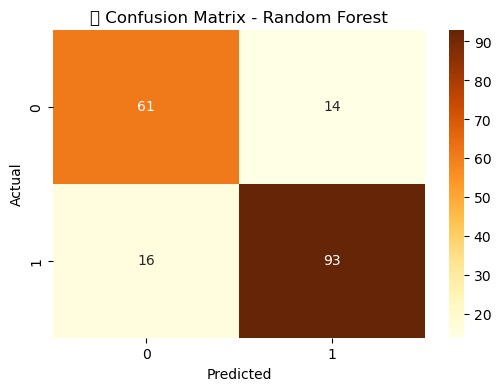

In [13]:
model = RandomForestClassifier()
cv = StratifiedKFold(n_splits = 5 , shuffle = True , random_state = 42)
score = cross_val_score(model , X_train_transformed , y_train ,cv = cv , scoring = "accuracy")
print(score)
print(np.mean(score))
model.fit(X_train_transformed , y_train)
y_pred = model.predict(X_test_transformed)
acc= accuracy_score(y_test , y_pred)
cr = classification_report(y_test , y_pred)
cm = confusion_matrix(y_test,y_pred)

print(f"\n Random Forest Accuracy: {acc:.4f}")
print("\n Classification Report:")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrBr')
plt.title("🔍 Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [14]:
{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


{'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 100}

In [15]:
categorical_cols = ['restecg','cp']

preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown='ignore'), categorical_cols)
], remainder='passthrough') 


model = RandomForestClassifier(max_depth = 10, max_features ='sqrt', min_samples_leaf =  4, min_samples_split = 10, n_estimators =  100)

pipeline = Pipeline([
        ('preprocessing', preprocessor),
        ('model', model)
    ])

cv = StratifiedKFold(n_splits = 5 , shuffle = True , random_state = 42)


score = cross_val_score(model , X_train_transformed , y_train ,cv = cv , scoring = "accuracy")

print(score)

print(np.mean(score))

[0.79054054 0.7755102  0.80952381 0.80952381 0.78231293]
0.793482257767972


In [16]:
model.fit(X_train_transformed , y_train)
model.score(X_test_transformed , y_test)

0.8206521739130435

In [17]:
parameters = {'max_depth': 11, 'min_samples_split': 8, 'min_samples_leaf': 18, 'max_leaf_nodes': 34, 'min_impurity_decrease': 0.00018525474790326396}

In [ ]:
import optuna
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np
from optuna.samplers import TPESampler

categorical_cols = ['restecg','cp']

preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown='ignore'), categorical_cols)
], remainder='passthrough') 

def objective(trial):
    max_depth = trial.suggest_categorical("max_depth", [None] + list(range(6, 15)))  # Avoid too deep trees
    min_samples_split = trial.suggest_int("min_samples_split", 5, 15)  # Encourage moderate splits
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 4, 10)    # Prevent overfitting small leaves
    max_leaf_nodes = trial.suggest_categorical("max_leaf_nodes", [None] + list(range(10, 30)))  # Avoid too many leaves
    min_impurity_decrease = trial.suggest_float("min_impurity_decrease", 1e-6, 1e-3, log=True)  # Enough purity requirement
    n_estimators = trial.suggest_categorical("n_estimators", list(range(200, 500, 50)))  # More trees, but not too few

    model =  RandomForestClassifier(
        n_estimators = n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_leaf_nodes=max_leaf_nodes,
        min_impurity_decrease=min_impurity_decrease,
        n_jobs =  -1,
        random_state=42
    )

    pipeline = Pipeline([
            ('preprocessing', preprocessor),
            ('model', model)
        ])

    score = cross_val_score(pipeline, X_train_transformed, y_train, cv=cv, scoring="accuracy")

    return np.mean(score)

study = optuna.create_study(direction = 'maximize',sampler = TPESampler(seed = 42))
study.optimize(objective , n_trials = 50)

print("Best mean CV accuracy:", study.best_value)
print("Best parameters:", study.best_params)
    

[I 2025-09-09 09:31:58,234] A new study created in memory with name: no-name-ff50f27b-35cd-4349-a6d3-8fa85357dd8e
[I 2025-09-09 09:32:03,296] Trial 0 finished with value: 0.7921676778819636 and parameters: {'max_depth': 6, 'min_samples_split': 5, 'min_samples_leaf': 10, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0007025166339242157, 'n_estimators': 200}. Best is trial 0 with value: 0.7921676778819636.
[I 2025-09-09 09:32:09,292] Trial 1 finished with value: 0.7976006618863762 and parameters: {'max_depth': 8, 'min_samples_split': 15, 'min_samples_leaf': 9, 'max_leaf_nodes': 26, 'min_impurity_decrease': 0.0002795015916508333, 'n_estimators': 300}. Best is trial 1 with value: 0.7976006618863762.
[I 2025-09-09 09:32:16,817] Trial 2 finished with value: 0.7935282220996507 and parameters: {'max_depth': 13, 'min_samples_split': 6, 'min_samples_leaf': 8, 'max_leaf_nodes': 29, 'min_impurity_decrease': 0.00026568139241144923, 'n_estimators': 400}. Best is trial 1 with value: 0.7976006618

In [ ]:
pipeline = Pipeline([
            ('preprocessing', preprocessor),
            ('model', RandomForestClassifier(**study.best_params ,n_jobs =  -1, random_state=42))
        ])
score = cross_val_score(pipeline ,X_train_transformed , y_train , cv = cv , scoring = "accuracy")
print(score)
print(np.mean(score))

In [ ]:
pipeline.fit(X_train_transformed , y_train)
pipeline.score(X_test_transformed,y_test)

In [ ]:
y_pred = pipeline.predict(X_test_transformed)

In [ ]:
acc= accuracy_score(y_test , y_pred)
cr = classification_report(y_test , y_pred)
cm = confusion_matrix(y_test,y_pred)

print(f"\n Random Forest Accuracy: {acc:.4f}")
print("\n Classification Report:")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrBr')
plt.title("🔍 Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from numpy import sqrt, argmax, mean
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('model', RandomForestClassifier(**study.best_params, n_jobs=-1, random_state=42))
])


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
thresholds = []

print("\n Finding Best Thresholds using CV:")

for fold, (train_idx, val_idx) in enumerate(cv.split(X_train_transformed, y_train), 1):
    X_tr, X_val = X_train_transformed.iloc[train_idx], X_train_transformed.iloc[val_idx]
    y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    # Train pipeline on current fold
    pipeline.fit(X_tr, y_tr)

    # Predict probabilities on validation fold
    val_probs = pipeline.predict_proba(X_val)[:, 1]

    # ROC curve and G-Mean
    fpr, tpr, thresh = roc_curve(y_val, val_probs)
    gmeans = sqrt(tpr * (1 - fpr))
    ix = argmax(gmeans)
    best_thresh = thresh[ix]
    thresholds.append(best_thresh)
    
    print(f" Fold {fold} → Best Threshold: {best_thresh:.3f}, G-Mean: {gmeans[ix]:.3f}")


final_thresh = mean(thresholds)
print(f"\n Final Averaged Threshold from CV: {final_thresh:.3f}")


pipeline.fit(X_train_transformed, y_train)


test_probs = pipeline.predict_proba(X_test_transformed)[:, 1]
y_pred_best = (test_probs >= final_thresh).astype(int)


cm_best = confusion_matrix(y_test, y_pred_best)
acc_best = accuracy_score(y_test, y_pred_best)
print(f"\n Accuracy on Test Set (Tuned Threshold): {acc_best:.4f}")
print("\n Classification Report:")
print(classification_report(y_test, y_pred_best))


plt.figure(figsize=(6, 4))
sns.heatmap(cm_best, annot=True, fmt='d', cmap='YlGnBu')
plt.title(" Confusion Matrix - Tuned Threshold (Test Set)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


fpr_test, tpr_test, _ = roc_curve(y_test, test_probs)
plt.figure(figsize=(8,6))
plt.plot(fpr_test, tpr_test, label=f'AUC = {roc_auc_score(y_test, test_probs):.2f}', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess')
plt.axhline(y=final_thresh, linestyle=':', color='black', label=f'Tuned Threshold = {final_thresh:.2f}')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(" ROC Curve - Random Forest (Test Set)")
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [ ]:
from sklearn.metrics import roc_curve, auc


y_probs = pipeline.predict_proba(X_test_transformed)[:, 1]


fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")


plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='Random (Baseline)')


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity / Recall)")
plt.title(" ROC Curve - Random Forest Classifier")
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from numpy import sqrt, argmax
from sklearn.preprocessing import binarize


y_probs = pipeline.predict_proba(X_test_transformed)[:, 1]


fpr, tpr, thresholds = roc_curve(y_test, y_probs)


gmeans = sqrt(tpr * (1 - fpr))
ix = argmax(gmeans)
best_thresh = thresholds[ix]
print(f"\n Best Threshold (by G-Mean): {best_thresh:.3f}")
print(f" G-Mean at Best Threshold: {gmeans[ix]:.3f}")


y_pred_best = (y_probs >= best_thresh).astype(int)


cm_best = confusion_matrix(y_test, y_pred_best)
acc_best = accuracy_score(y_test, y_pred_best)

print(f"\n Accuracy (after threshold tuning): {acc_best:.4f}")
print("\n Classification Report (Best Threshold):")
print(classification_report(y_test, y_pred_best))


plt.figure(figsize=(6, 4))
sns.heatmap(cm_best, annot=True, fmt='d', cmap='YlGnBu')
plt.title(" Confusion Matrix - Tuned Threshold (Random Forest)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_probs):.2f}', color='darkorange')
plt.plot([0,1], [0,1], linestyle='--', label='Random Guess')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best Threshold')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest (Tuned Threshold)")
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [ ]:

fpr, tpr, thresholds = roc_curve(y_test, y_probs)

youden_j = tpr - fpr


ix = np.argmax(youden_j)
best_thresh_j = thresholds[ix]

print(f"\n Best Threshold (Youden's J): {best_thresh_j:.3f}")
print(f" Youden’s J Score at Best Threshold: {youden_j[ix]:.3f}")

y_pred_j = (y_probs >= best_thresh_j).astype(int)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("\n Classification Report (Youden's J):")
print(classification_report(y_test, y_pred_j))

acc_j = accuracy_score(y_test, y_pred_j)
print(f" Accuracy (Youden’s J threshold): {acc_j:.4f}")

# Step 7: Plot Confusion Matrix
cm_j = confusion_matrix(y_test, y_pred_j)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_j, annot=True, fmt='d', cmap='Blues')
plt.title(" Confusion Matrix - Youden's J Threshold")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# XG BOOST

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier(random_state = 42)

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier(random_state = 42)
score = cross_val_score(model ,X_train_transformed , y_train , cv=  cv ,scoring = "accuracy")
print(score)
print(np.mean(score))
model.fit(X_train_transformed, y_train)

# Evaluate on test set
test_accuracy = model.score(X_test_transformed, y_test)
print(f"Test Accuracy with Best Parameters: {test_accuracy:.4f}")


In [ ]:
import optuna
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBClassifier
import numpy as np

# Example categorical column list (adjust if needed)
categorical_cols = ['restecg', 'cp']

# One-hot encode categoricals
preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown='ignore'), categorical_cols)
], remainder='passthrough')

# CV setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Objective function for Optuna
def objective(trial):
    # Suggest hyperparameters
    params = {
        'n_estimators': trial.suggest_int("n_estimators", 100, 500, step=50),
        'max_depth': trial.suggest_int("max_depth", 3, 12),
        'learning_rate': trial.suggest_float("learning_rate", 0.01, 1, log=True),
        'subsample': trial.suggest_float("subsample", 0.7, 1.0),
        'gamma': trial.suggest_float("gamma", 0, 5),
        'random_state': 42,
        'n_jobs': -1,
        'eval_metric': 'logloss',  # Avoid deprecated 'use_label_encoder'
        # Don't include use_label_encoder
    }

    model = XGBClassifier(**params)

    pipeline = Pipeline([
        ('preprocessing', preprocessor),
        ('model', model)
    ])

    # 5-fold CV score
    score = cross_val_score(pipeline, X_train_transformed, y_train, cv=cv, scoring="accuracy")

    return np.mean(score)

# Optuna study
study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler(seed=42))
study.optimize(objective, n_trials=50)

print("Best mean CV accuracy:", study.best_value)
print("Best parameters:", study.best_params)


In [ ]:
# Train the final model with best params from Optuna
best_params = study.best_params

final_model = XGBClassifier(**best_params)

# Build final pipeline
final_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('model', final_model)
])

# Fit the final model on full training data
final_pipeline.fit(X_train_transformed, y_train)

# Evaluate on test set
y_pred = final_pipeline.predict(X_test_transformed)

acc= accuracy_score(y_test , y_pred)
cr = classification_report(y_test , y_pred)
cm = confusion_matrix(y_test,y_pred)

print(f"\n Random Forest Accuracy: {acc:.4f}")
print("\n Classification Report:")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrBr')
plt.title("🔍 Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



In [ ]:
final_model = XGBClassifier(**best_params)

# Build final pipeline
final_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('model', final_model)
])